In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd






In [6]:
# Dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



In [7]:
# Encode the dataset
encoder = TransactionEncoder()
encoded_data = encoder.fit(dataset).transform(dataset)


In [8]:
# Create a DataFrame from the encoded data
df = pd.DataFrame(encoded_data, columns=encoder.columns_)
df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [11]:
# Calculate itemset co-occurrence
itemset_cooccurrence = df.T.dot(df)

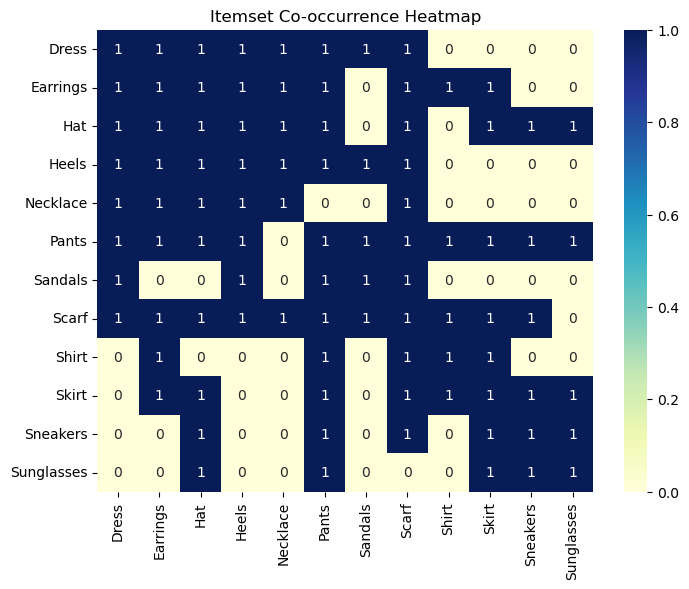

In [12]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(itemset_cooccurrence, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Itemset Co-occurrence Heatmap')
plt.show()

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the association rules
print(rules)


              antecedents                           consequents  \
0                 (Dress)                               (Heels)   
1                 (Heels)                               (Dress)   
2              (Necklace)                               (Dress)   
3               (Sandals)                               (Dress)   
4                 (Dress)                               (Scarf)   
..                    ...                                   ...   
670  (Necklace, Earrings)            (Dress, Scarf, Heels, Hat)   
671          (Heels, Hat)    (Dress, Scarf, Necklace, Earrings)   
672     (Heels, Earrings)         (Dress, Scarf, Necklace, Hat)   
673       (Hat, Earrings)       (Dress, Scarf, Necklace, Heels)   
674            (Necklace)  (Scarf, Dress, Heels, Hat, Earrings)   

     antecedent support  consequent support  support  confidence  lift  \
0                   0.4                 0.4      0.4         1.0  2.50   
1                   0.4                 0.4    

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

import numpy as np





# Dataset
data =pd.read_csv('Market_Basket_Optimisation.csv',header = None)
transactions=[]
for i in range(0,7501):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])
from apyori import apriori
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3, min_lenght=2)
results=list(rules)

results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [54]:
#putting results in organised Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [35]:
#displaying the results non-sorted
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
...,...,...,...,...,...
155,ground beef,spaghetti,0.003066,0.216981,3.632981
156,ground beef,spaghetti,0.003066,0.211009,3.532991
157,ground beef,spaghetti,0.003066,0.261364,4.376091
158,spaghetti,nan,0.003333,0.211864,3.223519


In [36]:
#displaying the results sorted in descending fits
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
97,soup,milk,0.003066,0.383333,7.987176
150,soup,milk,0.003066,0.383333,7.987176
96,frozen vegetables,milk,0.003333,0.294118,6.128268
149,frozen vegetables,milk,0.003333,0.294118,6.128268
132,mineral water,nan,0.003866,0.402778,6.128268
59,mineral water,olive oil,0.003866,0.402778,6.115863
50,tomato sauce,ground beef,0.003066,0.216981,5.535971
122,tomato sauce,ground beef,0.003066,0.216981,5.535971
28,fromage blanc,nan,0.003333,0.245098,5.178818
3,fromage blanc,honey,0.003333,0.245098,5.164271


In [48]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Perform one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(resultsinDataFrame).transform(resultsinDataFrame)
dfa = pd.DataFrame(te_ary, columns=te.columns_)
dfa.head()

,,C,H,L,R,S,a,c,d,e,f,g,h,i,n,o,p,r,t,u
0,True,False,True,True,False,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False
1,True,False,True,False,True,True,True,False,True,True,False,True,True,True,True,False,False,False,True,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True
3,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False


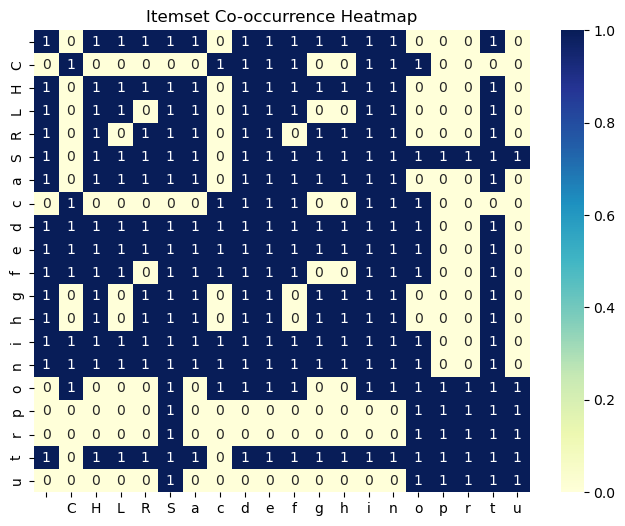

In [56]:
 #Encode the data using one-hot encoding
encoded_data = pd.get_dummies(dfa)

# Calculate the itemset co-occurrence matrix
itemset_cooccurrence = np.dot(encoded_data.T, encoded_data)

# Create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(itemset_cooccurrence, annot=True, cmap='YlGnBu', fmt='g', xticklabels=dfa.columns, yticklabels=dfa.columns)
plt.title('Itemset Co-occurrence Heatmap')
plt.show()
#This heatmap visualizes how often different items occur together in the transactions, providing insights into which items are often purchased together.

